In [1]:
import wfdb
import os
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\Mazen\Desktop\New folder\mit-bih-arrhythmia-database-1.0.0')
from wfdb import processing
import numpy as np
import pandas as pd

In [56]:
directory = os.listdir()
directory = list(map(lambda x : x.split('.')[0] , directory))[:-5]
directory.remove('102-0')
directory = set(directory)
directory = list(directory)

In [57]:
directory

['203',
 '219',
 '124',
 '234',
 '108',
 '233',
 '102',
 '205',
 '202',
 '230',
 '222',
 '114',
 '232',
 '101',
 '105',
 '116',
 '223',
 '228',
 '213',
 '212',
 '215',
 '210',
 '231',
 '214',
 '111',
 '113',
 '107',
 '123',
 '221',
 '103',
 '104',
 '201',
 '119',
 '106',
 '208',
 '207',
 '200',
 '112',
 '121',
 '209',
 '217',
 '220',
 '100',
 '118',
 '109',
 '115',
 '122',
 '117']

In [66]:
for i in ann.__dict__['sample']:
    print(i)

18
77
370
662
946
1231
1515
1809
2044
2402
2706
2998
3282
3560
3862


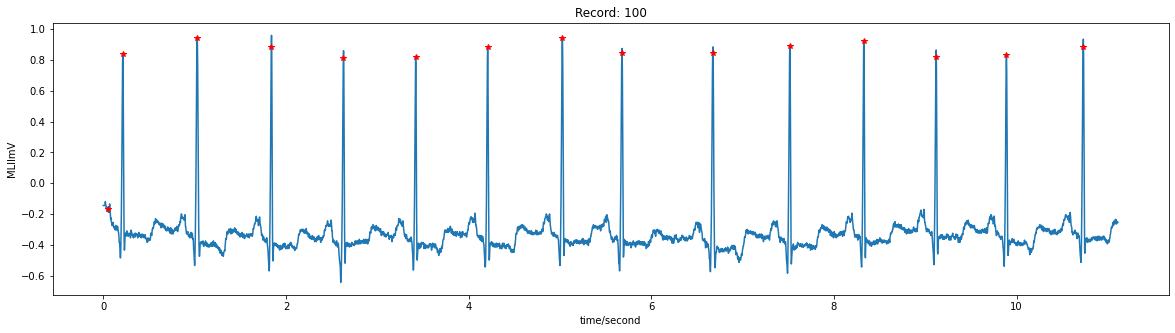

In [58]:
record = wfdb.rdrecord('100' , sampto=4000   ,channels=[0])
ann = wfdb.rdann('100' , 'atr' , sampto=4000)
wfdb.plot_wfdb(record , annotation=ann ,figsize=(20 , 5))

In [67]:
def extract_beats_and_labels(sig_directory):
    window_size = 256
    Full_Signal = wfdb.rdrecord(sig_directory ,sampto=10000   ,channels=[0] )
    Full_Signal =  Full_Signal.__dict__['p_signal'].flatten()
    ann    = wfdb.rdann(sig_directory ,'atr' , sampto=10000 )
    ann_pos =ann.__dict__['sample'][2:-1]
    ann_sym =ann.__dict__['symbol'][2:-1]
    #return ann_sym , ann_pos
    data_Full = []
    data_Sym = []
    for QRS_pos ,Beat_diagnose in zip(ann_pos , ann_sym):
        start  = QRS_pos-window_size//2
        end  = QRS_pos + window_size // 2
        signal_corpus= Full_Signal[start:end]
        if len(signal_corpus) ==256 :
            #print(len(signal_corpus))
            data_Full.append(list(signal_corpus))
            data_Sym.append(Beat_diagnose)
    return data_Full , data_Sym 
    #return ann_pos , ann_sym

In [68]:
X=[]
Y=[]
for i in directory:
    Full_Signal , annotation_symbol = extract_beats_and_labels(i)
    X.extend(Full_Signal)
    Y.extend(annotation_symbol)
X = np.array(X)
Y = np.array(Y)

In [74]:
X

array([[-0.045, -0.125, -0.28 , ...,  0.03 ,  0.025,  0.02 ],
       [-0.08 , -0.1  , -0.05 , ..., -0.375, -0.345, -0.265],
       [-0.12 , -0.08 , -0.145, ..., -0.455, -0.38 , -0.33 ],
       ...,
       [-0.805, -0.81 , -0.8  , ..., -0.705, -0.725, -0.735],
       [-0.88 , -0.89 , -0.905, ..., -0.725, -0.735, -0.75 ],
       [-0.815, -0.79 , -0.805, ..., -0.62 , -0.635, -0.655]])

In [85]:
Normal_mask = Y=='N'
abnormal_mask = Y!='N'
Normal_data = X[Normal_mask]
abnormal_data = X[abnormal_mask]

In [100]:
np.ones(shape = (500) , dtype = bool).shape
np.zeros(shape = (1613-500) , dtype = bool).shape

(1113,)

In [92]:
len(my_filter)

806

In [ ]:
model = Sequential()
model.add(Conv1D(128, 55, activation='relu', input_shape=(256, 1)))
model.add(MaxPooling1D(10))
model.add(Dropout(0.5))
model.add(Conv1D(128, 25, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(128, 10, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
# model.add(Flatten())
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])